     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed   
0       1         0     0     1         0        0         1        1  \
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize   
0           1         1         0     0     4    

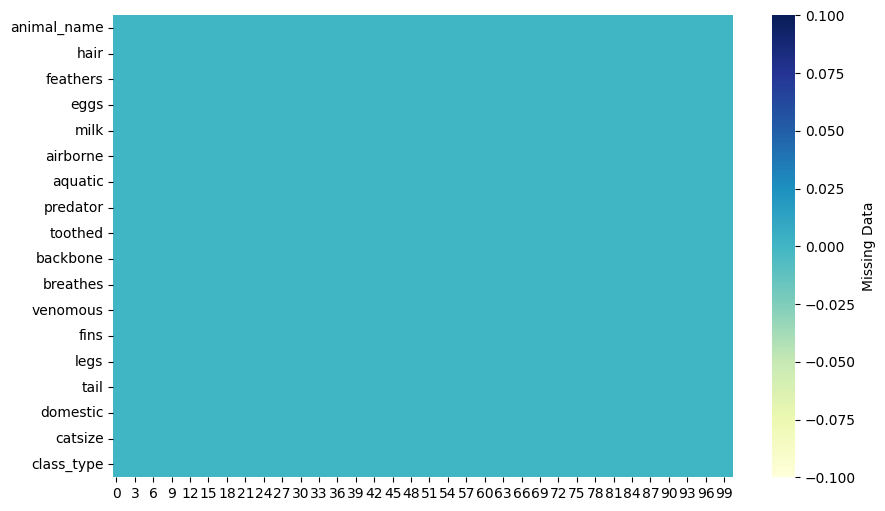

<Figure size 1000x600 with 0 Axes>

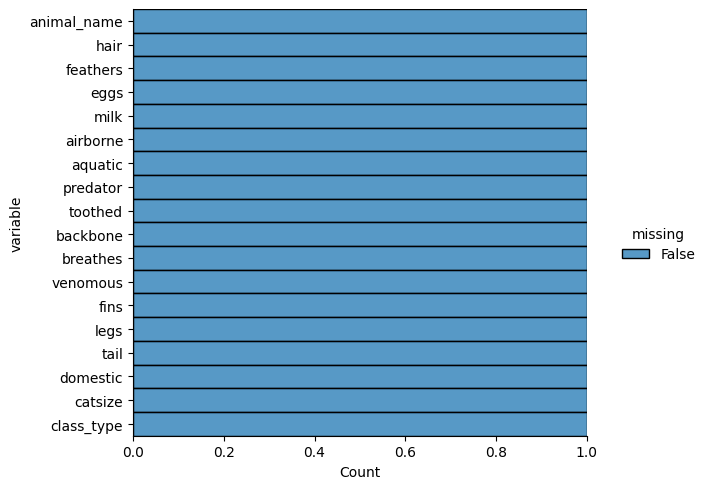

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
zoo_df = pd.read_csv('C:/Users/91948/Desktop/mi model and data visualization/ml_classifier/zoo.csv')
zoo_df.head()

#to check for missing data in a dataset using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(zoo_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

#to check for missing data in a dataset using distribution plot
plt.figure(figsize=(10,6))
sns.displot(
    data=zoo_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
k=zoo_df.drop("animal_name", axis=1)
p=k.drop("class_type", axis=1)
print(k)
print(p)

if k.duplicated().any():
    h=k.drop_duplicates()
else:
    print("no duplicates")
print(h)

As we can see from the heat map and distribution plot there is no null values in our dataset hence we do not need to do any filling

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1500x1500 with 0 Axes>

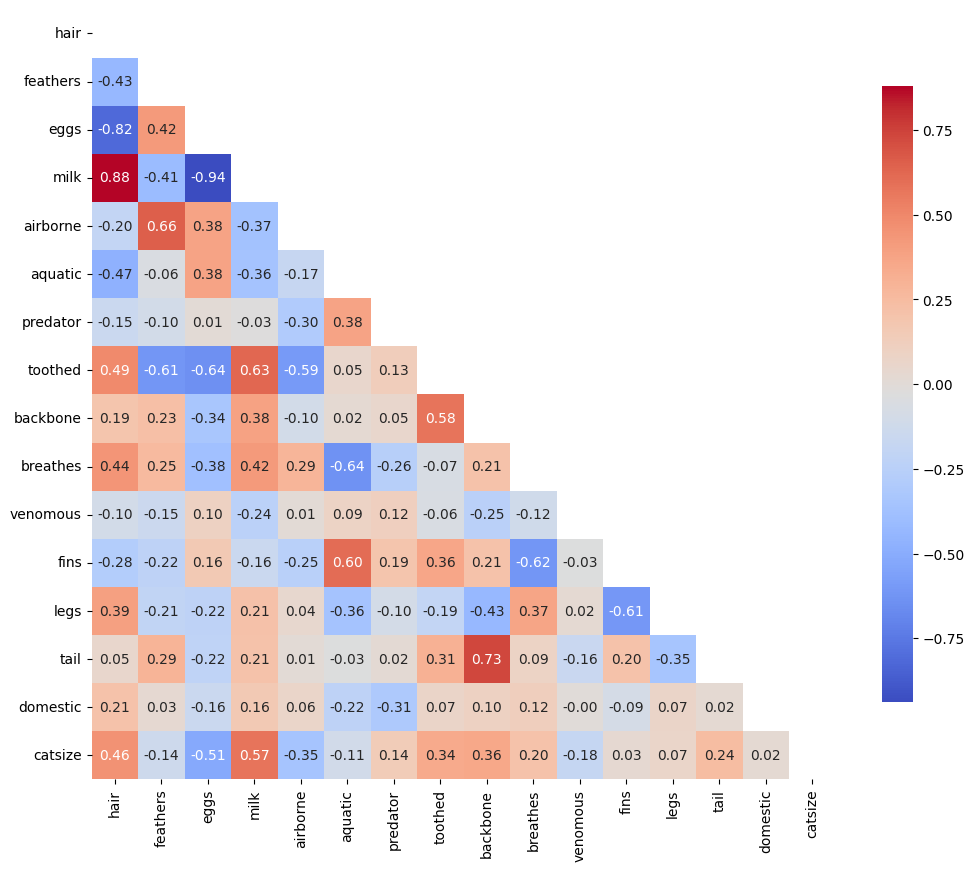

In [16]:

plt.figure(figsize=(15, 15))  # Enlarge figure size
g = sns.pairplot(h, 
                 hue='class_type',
                 markers=["o", "s", "D", "v", "p", "P", "X"],
                 size=5,  # Increase marker size
                 palette="deep")  # Use a darker color palette

# Add legend for markers
for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Class Type")  # Add legend with title
    for scatter in ax.collections:
        scatter.set_alpha(0.5)
        for line in ax.lines:
            line.set_linewidth(1)  # Set line thickness for each plot

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


# Correlation Matrix with better clarity
correlation_matrix =p.corr()  # Exclude non-numerical column
plt.figure(figsize=(12, 10))  # Enlarge figure size
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create a mask for upper triangle
sns.heatmap(correlation_matrix, mask=mask,  # Apply the mask
             annot=True,
             cmap='coolwarm',
             fmt=".2f",
             annot_kws={"fontsize": 10},  # Increase font size
             cbar_kws={"shrink": 0.8})  # Adjust colorbar size
plt.show()


As we can see from the two plots i have plotted pairplot and correlation heat map the pairplot represents the relation between two attributes (hair and milk) and which class (class1 ,class2,class3 and class4 etc) majority represents those attributes is indicated by it while the heatmap represents the correlation between the various attributes red indicating high correlation and dark blue representing low correlation.
example

1)(hair vs milk)
according to the heatmap there is a strong correlation represented by the attributes hair and milk as it is in deep red color and we know the only type of animals that have both hair and milk are only mammals so in the pairplot of (hair vs milk) only class1 which represents mammals has the coordinates(1,1) supporting the hypothesis

2)(backbone and tail)
according to the heatmap there is a strong correlation between the attributes(tail and backbone) as it is in deep red color and we know only type of animals that have both backbone and tail are mammals so in the pairplot of (backbone vs tail) only class1 which represents the mammals has the coordinate(1,1) supporting the hypothesis

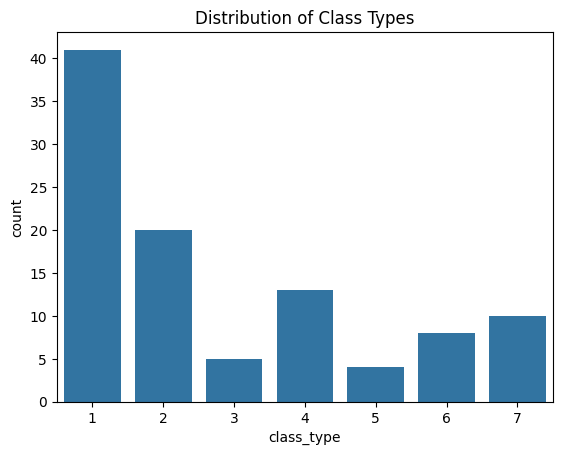

In [17]:
sns.countplot(x='class_type', data=zoo_df)
plt.title('Distribution of Class Types')
plt.show()


we can see from the class distribution plot the majority of the animals in the dataset belong to that of class1 i.e class mammals

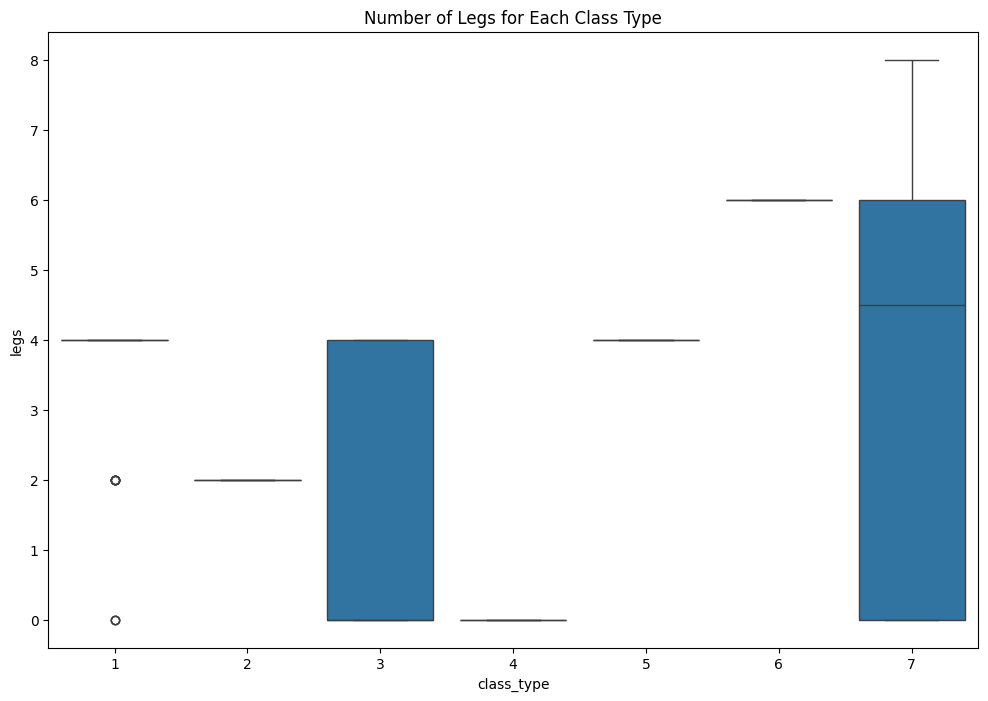

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='class_type', y='legs', data=zoo_df)
plt.title('Number of Legs for Each Class Type')
plt.show()


Leg Number Distributions Across Animal Classes:

class 1 Mammals: Typically have 4 legs, with outliers at 0 and 2 legs reflecting aquatic and flying adaptations.

class 2 Birds: Consistent 2 legs, reflecting their adaptation for flight.

class 3 Reptiles: Diverse leg patterns ranging from 0 to 4 legs, encompassing snakes, lizards, and aquatic species.

class 4 Fish: No legs (0), relying on fins for locomotion.

class 5 Amphibians: Consistent 4 legs, adapted for both terrestrial and aquatic environments.

class 6 Bugs: Consistent 6 legs, aligning with their hexapod classification.

class 7 Invertebrates: Variable leg numbers ranging from 0 to 8 legs, with a median between 4 and 5 legs. The majority of invertebrates have 4 or fewer legs, with a smaller proportion having more than 4.

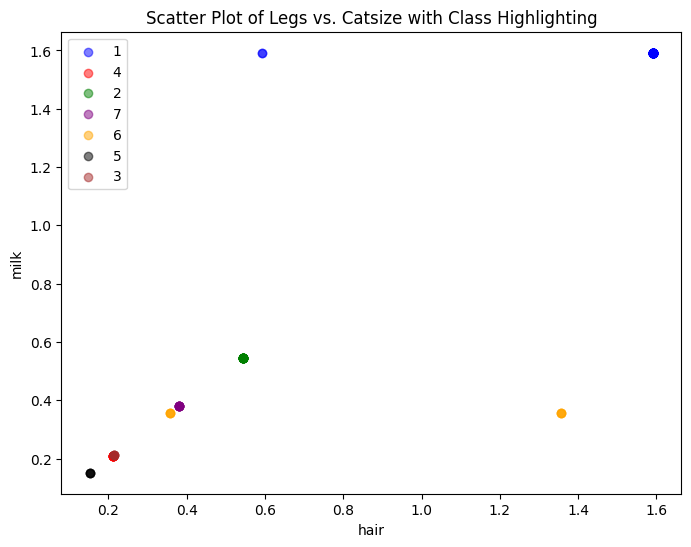

In [19]:


# Extract the features and class labels
features = zoo_df[["milk", "hair"]]
classes = zoo_df["class_type"]

# Create the scatter plot with class highlighting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for class_label, color in zip(classes.unique(), ["blue", "red", "green", "purple","orange","black","brown"]):  # Customize colors
    class_data = features[classes == class_label]
    jitter = np.random.uniform(len(class_data)) * 0.05  # Adjust jitter amount as needed
    plt.scatter(
        class_data["hair"] + jitter,
        class_data["milk"] + jitter,
        color=color,
        label=class_label,
        alpha=0.5,  # Set transparency for overlapping points
    )
# Add labels, title, and legend
plt.xlabel("hair")
plt.ylabel("milk")
plt.title("Scatter Plot of Legs vs. Catsize with Class Highlighting")
plt.legend()

# Show the plot
plt.show()


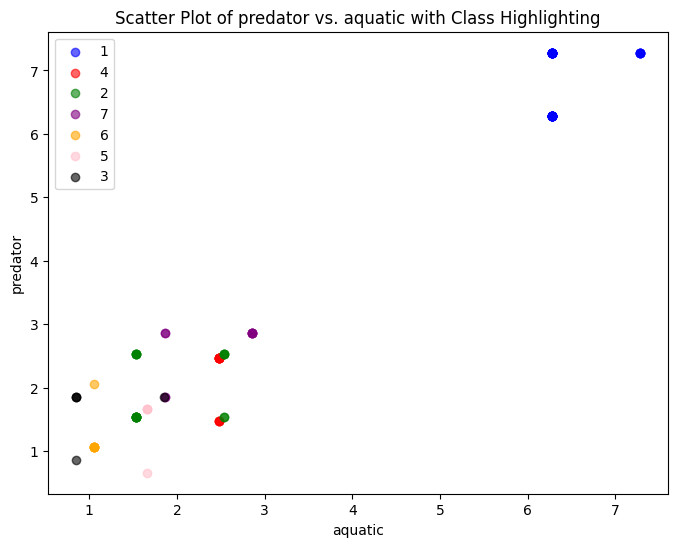

In [20]:


# Extract the features and class labels
features = zoo_df[["predator", "aquatic"]]
classes = zoo_df["class_type"]

# Create the scatter plot with class highlighting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for class_label, color in zip(classes.unique(), ["blue", "red", "green", "purple","orange","pink","black"]):  # Customize colors
    class_data = features[classes == class_label]
    jitter = np.random.uniform(len(class_data)) * 0.2 # Adjust jitter amount as needed
    plt.scatter(
        class_data["aquatic"] + jitter,
        class_data["predator"] + jitter,
        color=color,
        label=class_label,
        alpha=0.6,  # Set transparency for overlapping points
    )
# Add labels, title, and legend
plt.xlabel("aquatic")
plt.ylabel("predator")
plt.title("Scatter Plot of predator vs. aquatic with Class Highlighting")
plt.legend()

# Show the plot
plt.show()


as we can see from the scatter plot class 1,class 3,class 4,class 5 and class 7 usually appear in clusters more frequently indication that animals belonging to these classes if they are aquatic have a higher probability of begin a predator also

Explained Variance Ratios:
[0.62561548 0.14496905]


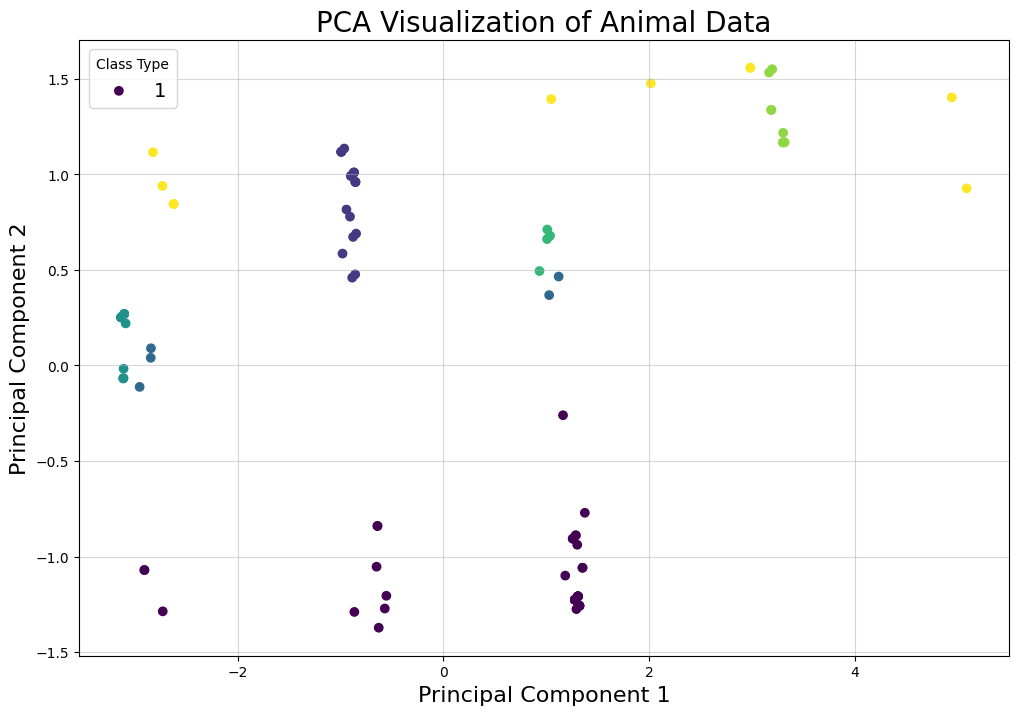

In [42]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset


# Separate features and class labels (if applicable)
X = k.drop("class_type", axis=1)  # Assuming class labels are in "class_type" column
y = k["class_type"]  # Store class labels separately (optional for visualization)

# Create a PCA object and fit it to the features
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principalComponents = pca.fit_transform(X)

# Explained variance ratios (optional):
print("Explained Variance Ratios:")
print(pca.explained_variance_ratio_)

# Enhanced visualization:
plt.figure(figsize=(12, 8))  # Larger figure size
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap="viridis")  # Color by class
plt.xlabel("Principal Component 1", fontsize=16)
plt.ylabel("Principal Component 2", fontsize=16)
plt.title("PCA Visualization of Animal Data", fontsize=20)
plt.legend(y.unique(), fontsize=14, title="Class Type")  # Include legend for classes
plt.grid(True, alpha=0.5)  # Add gridlines
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# Load the dataset



# ------------------------------------------------
# Logistic Regression Baseli# Separate features and target variable
X = k.drop("class_type", axis=1)
y = k["class_type"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------
# Correlation Analysis
# ------------------------------------------------
correlations = X.corrwith(y)
print("Correlations with the target variable:\n", correlations)
ne Model
# ------------------------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ------------------------------------------------
# Permutation Importance
# ------------------------------------------------
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
print("Permutation Importance:\n", perm_importance.importances_mean)

# ------------------------------------------------
# Decision Tree-Based Importance
# ------------------------------------------------
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_importances = tree_model.feature_importances_
print("Decision Tree-Based Importance:\n", tree_importances)


Correlations with the target variable:
 hair       -0.562384
feathers   -0.197520
eggs        0.661825
milk       -0.723683
airborne    0.022677
aquatic     0.326639
predator    0.061179
toothed    -0.471527
backbone   -0.828845
breathes   -0.519308
venomous    0.321476
fins        0.099430
legs        0.131693
tail       -0.631830
domestic   -0.181043
catsize    -0.521030
dtype: float64
Accuracy: 0.9523809523809523
Permutation Importance:
 [0.         0.         0.         0.         0.07142857 0.03809524
 0.02857143 0.         0.         0.01904762 0.         0.
 0.08095238 0.         0.         0.        ]
Decision Tree-Based Importance:
 [0.         0.23178637 0.         0.36384843 0.05073704 0.06430868
 0.02046185 0.         0.08518812 0.         0.         0.15151515
 0.03215434 0.         0.         0.        ]
